# Python Assignment \#2: Neyman-Pearson Detectors

1) Load the **digits** dataset by importing the load_digits library from sklearn.datasets. (Visit http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html for detailed information about using this library.) This is the MNIST dataset, which is frequently used in machine learning for benchmarking the performance of a learning algorithm. After loading the dataset, display an image from the first two classes "0" and "1".

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits(n_class=10)
images = digits.images
targets = digits.target

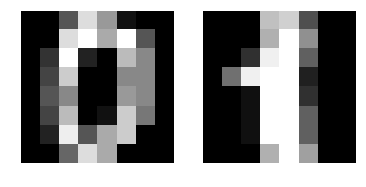

In [3]:
sub = plt.subplot(1,2,1)
sub.axis("off")
plt.imshow(images[0],cmap=plt.cm.gray,interpolation="nearest")

sub = plt.subplot(1,2,2)
sub.axis("off")
plt.imshow(images[1],cmap=plt.cm.gray,interpolation="nearest")

plt.show()

2) You are going to build detectors that work on Gaussian distributions, where the model parameters are derived from the MNIST images. First, compute the aritmetic mean of the images in class 0 and class 1. Store the result in arrays called mu_0 and mu_1, respectively. Plot these means as 8x8 images.

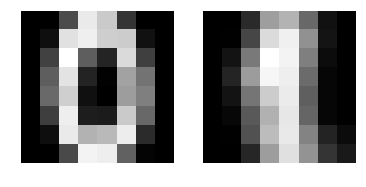

In [5]:
#class 0
indices_0 = targets == 0
images_0 = images[indices_0]
mu_0 =  np.mean(images_0,0)

#class 1
indices_1 = targets == 1
images_1 = images[indices_1]
mu_1 =  np.mean(images_1,0)

sub = plt.subplot(1,2,1)
sub.axis("off")
plt.imshow(mu_0,cmap=plt.cm.gray,interpolation="nearest")

sub = plt.subplot(1,2,2)
sub.axis("off")
plt.imshow(mu_1,cmap=plt.cm.gray,interpolation="nearest")

plt.show()

3) Now, we'll build up the Gaussian likelihood functions. Define a variable sigma_2, and let the likelihood functions be p(y|H=0) = N(mu_0,sigma_2 * I) and p(y|H=1) = N(mu_1,sigma_2 * I). For any value of sigma_2>0 you like, generate and plot a sample from the two distributions.

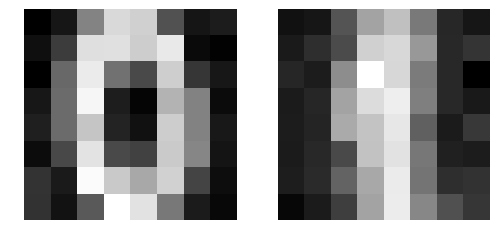

In [31]:
sigma_2 = 1
y_0 = mu_0 + np.sqrt(sigma_2)*np.random.randn(8,8)
y_1 = mu_1 + np.sqrt(sigma_2)*np.random.randn(8,8)

sub = plt.subplot(1,2,1)
sub.axis("off")
plt.imshow(y_0,cmap=plt.cm.gray,interpolation="nearest")

sub = plt.subplot(1,2,2)
sub.axis("off")
plt.imshow(y_1,cmap=plt.cm.gray,interpolation="nearest")

plt.show()

4) For sigma_2=1000, derive the Neyman-Pearson detector associated with the LLR nu=0. Draw 1000 samples from p(y|H=0), put them through the detector, and estimate the false-alarm probability. Repeat for 1000 samples from p(y|H=1) and the detection probability. Then, repeat for nu=500 and mu=-500.

In [39]:
NUM_SAMPLES = 1000
sigma_2 = 1000
p_fa = 0
p_d = 0

w = mu_1.flatten() - mu_0.flatten()
threshold =  -500 + 1/2*(mu_1.flatten().T@mu_1.flatten() - mu_0.flatten().T@mu_0.flatten())
for i in range(0,NUM_SAMPLES):
    y = mu_0 + np.sqrt(sigma_2)*np.random.randn(8,8)
    y = y.flatten()
    if(w.T@y > threshold):
        p_fa += 1/NUM_SAMPLES

for i in range(0,NUM_SAMPLES):
    y = mu_1 + np.sqrt(sigma_2)*np.random.randn(8,8)
    y = y.flatten()
    if(w.T@y > threshold):
        p_d += 1/NUM_SAMPLES
        
print(p_fa)
print(p_d)

0.3940000000000003
0.8620000000000007


5) For noise variances sigma_2 = {10,100,500,1000,5000,10000}, numerically compute and plot the ROC curve. Do this by computing P_fa and P_d for a range of threshold values as in part (4), and plotting the resulting (P_fa,P_d) points on an axis. You will need to experiment with the range of threshold values to get a nice plot.

Put all of the ROC curves on the same plot, and put a legend on the plot to show which curve is associated with which value of sigma_2.  Is the resulting ROC curve convex?

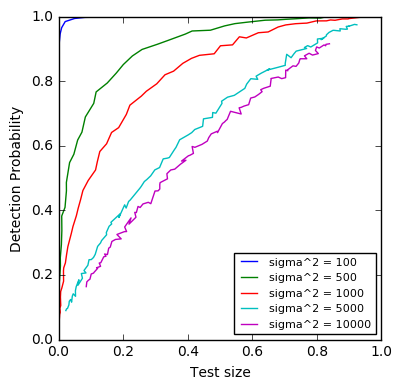

In [60]:
NUM_SAMPLES = 5000
sigma_2s = [100,500,1000,5000,10000]
thresholds = np.arange(-5000,5000,100)

w = mu_1.flatten() - mu_0.flatten()

for i in range(0,len(sigma_2s)):
    p_fa = np.zeros(thresholds.size)
    p_d = np.zeros(thresholds.size)
    for j in range(0,thresholds.size):
        sigma_2 = sigma_2s[i]
        threshold =  thresholds[j] + 1/2*(mu_1.flatten().T@mu_1.flatten() - mu_0.flatten().T@mu_0.flatten())
        
        for k in range(0,NUM_SAMPLES):
            y = mu_0 + np.sqrt(sigma_2)*np.random.randn(8,8)
            y = y.flatten()
            if(w.T@y > threshold):
                p_fa[j] += 1/NUM_SAMPLES

        for k in range(0,NUM_SAMPLES):
            y = mu_1 + np.sqrt(sigma_2)*np.random.randn(8,8)
            y = y.flatten()
            if(w.T@y > threshold):
                p_d[j] += 1/NUM_SAMPLES

    plt.plot(p_fa,p_d)

plt.xlabel("Test size")
plt.ylabel("Detection Probability")
plt.gca().set_aspect(1,'box')
plt.xlim(xmax=1)
plt.ylim(ymax=1)
plt.gca().legend(['sigma^2 = 100','sigma^2 = 500','sigma^2 = 1000','sigma^2 = 5000','sigma^2 = 10000'],loc=0,fontsize=8)
plt.tight_layout()
plt.show()